In [1]:
import pandas as pd
import io
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [40]:
J1=620.32 #Это первая энергия ионизации, поменять на свою
J2=3800.83 #Это вторая энергия ионизации, поменять на свою
P=100.
T0=300
k=1.38*1e-23
n0=3.3*1e18 #Если у вас дана начальная концентрация, вот это тоже поменять
ge=2
g2=1


ga = 120 #Вот это статвес атома, его поменять на свой
g1 = 13 #Вот это статвес первого иона, тоже поменять на свой

In [11]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [27]:
table = pd.read_csv('grotrian.csv', sep = ';', header=None)
#table = pd.read_csv('grotrian.csv')
#print(table.head)
J = table[3]
print(J)
E = table[4]
print(E)
g = 0
for i in range(J.size-900):
    if isfloat(J[i]) and isfloat(E[i]):
        g += (2*float(J[i])+1)*np.e**(-(float(E[i]))/(0.5*8065.48))
print(g)
g = 0
i = 1
if isfloat(J[i]) and isfloat(E[i]):
    g += (2*float(J[i])+1)*np.e**(-(float(E[i]))/(0.5*8065.48))
print(g)

0      J  
1        6
2        5
3        7
4        3
      ... 
947      9
948      9
949     10
950     10
951     11
Name: 3, Length: 952, dtype: object
0      ������� (�� -1)
1                    0
2               620.32
3              3800.83
4              3868.49
            ...       
947           40692.05
948           41139.01
949           41417.66
950            42062.9
951           44581.39
Name: 4, Length: 952, dtype: object
83.38379045178418
13.0


In [59]:
T = 0.5

def func(n):
    return [ge*g1/ga*n[3]/n[2]*(3*10**21*T**1.5)*np.exp(-J1/T)-n[0],
          ge*g2/g1*n[0]/n[2]*(3*10**21*T**1.5)*np.exp(-J2/T)-n[1],
          n[0]+2*n[1]-n[2],
          n0-(n[0]+n[1])-n[3]]

n=[1e+6,1,1e+6,1e+17]

sols = []
r = []
w = []
Ts = np.linspace(0.5,100, 100, endpoint=True)

for T in Ts:
    root = fsolve(func, n)
    n = root
    print(root)
    sols.append(n.copy())
    r.append(740*np.sqrt(T/n[2]))
    w.append(5.6*1e4*np.sqrt(n[2]))
sols = np.array(sols)
r = np.array(r)
w = np.array(w)


[ 7.46325525e-26 -3.15732140e-31  7.46262416e-26  3.30000000e+18]
[-1.62801376e-37  9.68235932e-42  2.40578476e-34  3.30000000e+18]
[ 1.97151578e-34 -2.96913971e-51  1.97151577e-34  3.30000000e+18]
[1.97151578e-34 6.47597720e-63 3.94303158e-34 3.30000000e+18]
[2.27696929e-010 2.39383049e-116 2.27696929e-010 3.30000000e+018]
[4.55393861e-010 7.82434470e-125 4.55393861e-010 3.30000000e+018]
[ 4.55393861e-010 -1.70655046e-136  9.10787729e-010  3.30000000e+018]
[2.80350322e+002 7.09406143e-174 2.80350322e+002 3.30000000e+018]
[5.60671819e+002 6.06139466e-172 5.60671819e+002 3.30000000e+018]
[ 1.12134355e+003 -7.22993662e-136  1.12134355e+003  3.30000000e+018]
[4.63376138e+007 5.54748536e-135 4.63376138e+007 3.30000000e+018]
[ 9.21915673e+007 -1.16061953e-105  9.21915673e+007  3.30000000e+018]
[5.83317418e+009 7.86209651e-110 5.83317418e+009 3.29999999e+018]
[3.84932385e+10 7.07480542e+05 3.84932385e+10 3.29999996e+18]
[1.96650118e+11 1.85140202e-08 1.96650118e+11 3.29999980e+18]
[ 8.164810

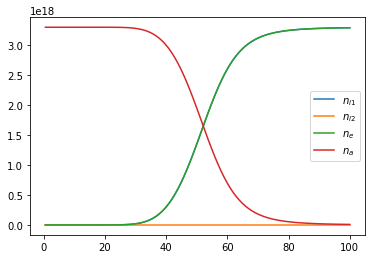

In [60]:
labels = ["$n_{i1}$", "$n_{i2}$", "$n_e$", "$n_a$"]
for i in range(4):
    plt.plot(Ts, sols[:, i], label=labels[i])
plt.legend()


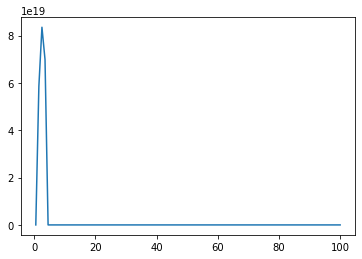

In [61]:
plt.plot(Ts, r)

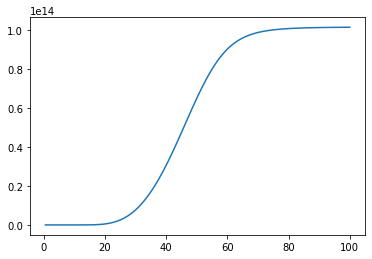

In [62]:
plt.plot(Ts, w)